# Linear Regression

The code is obtained from a Udemy course (PyTorch: Deep Learning and Artificial Intelligence).

The code is also complementary to notes found in Obsidian.

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# constants (model will try to predict these values)
N = 100
m = 0.5
b = -2

In [5]:
# generate random data of size N
X = np.random.random(N) * 10 - 5
Y = m * X + b + np.random.randn(N) # Gaussian noise added to the Y values
# Y = m * X + b

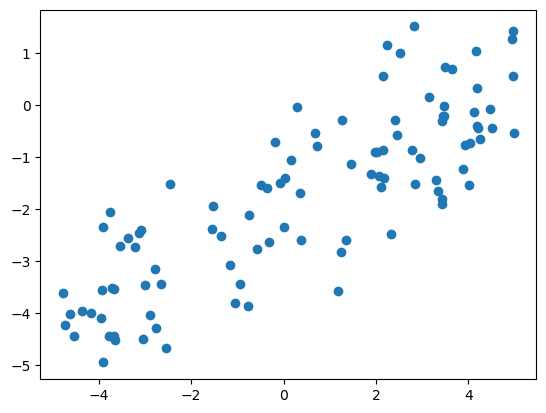

In [6]:
# plot the data
f = plt.scatter(X, Y)

In [7]:
# create a linear regression model
model = nn.Linear(1, 1)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [8]:
# reshape the data to be `num_samples` by `num_dimensions`
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# cast the data type to float32 (PyTorch uses float32 by default; numpy uses float64)
inputs = torch.from_numpy(X.astype(np.float32)) # X = torch.from_numpy(X).type(torch.FloatTensor)
target = torch.from_numpy(Y.astype(np.float32)) # Y = torch.from_numpy(Y).type(torch.FloatTensor)

In [9]:
print("INPUTS:", type(inputs))
print("TARGET:", type(target))

INPUTS: <class 'torch.Tensor'>
TARGET: <class 'torch.Tensor'>


An example of `reshape` is shown below. It changes the dimensions of an array.

In [10]:
arr = np.random.random(10) * 100 - 50
print("ARRAY:", arr)

ARRAY: [-31.02563949  13.06501762  18.56783629  14.44294447  37.54585244
   9.99045     37.67623977 -20.46570609 -14.01096746  37.99159712]


In [11]:
# reshape to 2 rows by 5 columns
print(arr.reshape(2, 5))

[[-31.02563949  13.06501762  18.56783629  14.44294447  37.54585244]
 [  9.99045     37.67623977 -20.46570609 -14.01096746  37.99159712]]


Both `inputs` and `target` variables are of type `torch.Tensor`.

In [12]:
# train the model
num_epochs = 40
losses = []
for it in range(num_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, target)

    # store losses in an array for plotting
    losses.append(loss.item())

    # backward pass
    loss.backward()
    optimizer.step()

    # store gradients in an array for plotting
    w = model.weight.data.numpy()
    b = model.bias.data.numpy()
    print(f'Epoch {it + 1}/{num_epochs}, Loss: {loss.item():.4f}, Weight: {w}, Bias: {b}')

Epoch 1/40, Loss: 13.5141, Weight: [[-0.3108427]], Bias: [0.63425124]
Epoch 2/40, Loss: 11.3310, Weight: [[-0.19049063]], Bias: [0.58862954]
Epoch 3/40, Loss: 9.8074, Weight: [[-0.09227273]], Bias: [0.5429213]
Epoch 4/40, Loss: 8.7224, Weight: [[-0.01204792]], Bias: [0.49731195]
Epoch 5/40, Loss: 7.9300, Weight: [[0.05354875]], Bias: [0.45194888]
Epoch 6/40, Loss: 7.3338, Weight: [[0.10725157]], Bias: [0.40694857]
Epoch 7/40, Loss: 6.8699, Weight: [[0.15128234]], Bias: [0.3624025]
Epoch 8/40, Loss: 6.4960, Weight: [[0.18744655]], Bias: [0.31838188]
Epoch 9/40, Loss: 6.1843, Weight: [[0.21721134]], Bias: [0.27494147]
Epoch 10/40, Loss: 5.9161, Weight: [[0.24176896]], Bias: [0.23212282]
Epoch 11/40, Loss: 5.6791, Weight: [[0.2620883]], Bias: [0.1899567]
Epoch 12/40, Loss: 5.4649, Weight: [[0.27895674]], Bias: [0.14846523]
Epoch 13/40, Loss: 5.2681, Weight: [[0.2930142]], Bias: [0.10766358]
Epoch 14/40, Loss: 5.0849, Weight: [[0.30478075]], Bias: [0.06756128]
Epoch 15/40, Loss: 4.9127, We

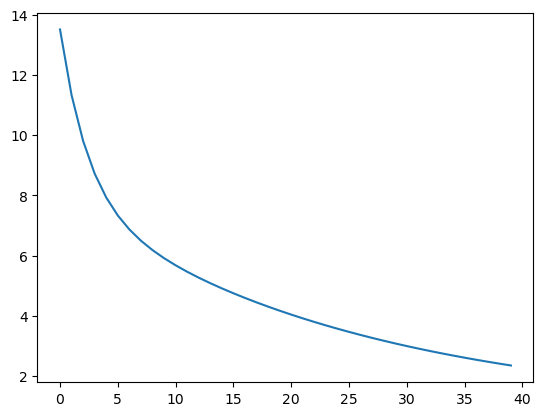

In [13]:
# plot the loss
plt.plot(losses)

A decreasing (fast start, slow end) curve is **ideal** when training machine learning models. 

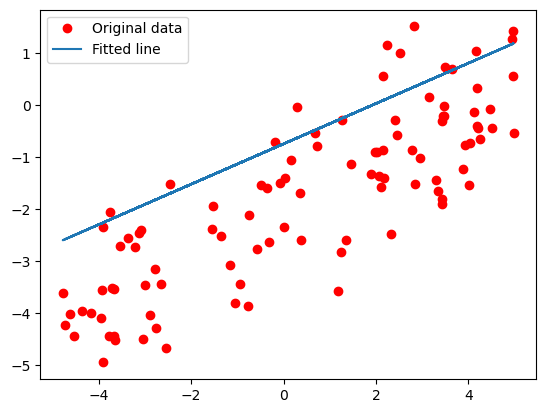

In [14]:
# prediction and plot
predicted = model(inputs).detach().numpy() # detach the tensor
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

Alternative way to make predictions without gradients is shown below.

In [15]:
with torch.no_grad():
    out = model(inputs).numpy()
print(out, type(out))

[[ 0.8727427 ]
 [ 0.81552047]
 [-2.1570542 ]
 [ 0.66194135]
 [-1.271511  ]
 [ 0.8833322 ]
 [ 0.59787554]
 [-2.16912   ]
 [-2.206954  ]
 [ 0.149674  ]
 [ 1.178617  ]
 [ 0.34449142]
 [-0.6376355 ]
 [-1.9906168 ]
 [-0.8695665 ]
 [-2.0540788 ]
 [ 0.1181618 ]
 [ 0.20095229]
 [-2.2576475 ]
 [ 0.8969564 ]
 [ 1.169589  ]
 [ 0.5337197 ]
 [-2.4369907 ]
 [ 0.08394349]
 [-1.8650222 ]
 [-0.4704053 ]
 [ 0.84438974]
 [-1.944504  ]
 [ 0.08501053]
 [-1.34068   ]
 [ 0.873149  ]
 [ 0.04796839]
 [ 0.58014923]
 [ 1.1809938 ]
 [-0.01463675]
 [ 0.5986132 ]
 [-0.6047957 ]
 [ 0.5774172 ]
 [-2.2821739 ]
 [-0.26003313]
 [-1.8223538 ]
 [ 0.80427486]
 [ 0.77417976]
 [-2.3653972 ]
 [-1.195883  ]
 [ 0.02228183]
 [ 0.23045516]
 [-1.9255731 ]
 [-2.2723181 ]
 [-0.48820075]
 [-0.6884971 ]
 [-2.5805886 ]
 [ 0.57743245]
 [-1.047667  ]
 [ 0.9831374 ]
 [ 1.0008061 ]
 [-0.17916828]
 [-1.736615  ]
 [-0.22583175]
 [-0.96922183]
 [-2.5009947 ]
 [ 0.7589732 ]
 [-0.88355416]
 [-1.0370624 ]
 [ 0.39745444]
 [ 0.8660379 ]
 [-1.69629

Inspect the parameters of the model to see if they match the original settings.
- slope `m` $\rightarrow$ weight `w`
- intercept `b` $\rightarrow$ bias `b`

In this example, the original weight and bias is already known.

In [16]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.38735488]] [-0.7471799]
